# Shoopala Nambahu 9662065 - Model building

In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
pip install pandas scikit-learn tensorflow

In [ ]:
# Load the data
data = pd.read_csv('/content/gdrive/MyDrive/Dropout.csv')

In [ ]:
data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [ ]:
# Using map function
data['Target'] = data['Target'].map({'Dropout': 0,'Enrolled': 1,  'Graduate': 2})
data['Target'] = data['Target'].astype(int)

In [ ]:
data['Target'].unique()

array([0, 2, 1])

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [ ]:
pip install --upgrade pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 85.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.2 which is incompatible.


In [ ]:
pip install scikeras

In [ ]:
pip uninstall tensorflow tensorflow-gpu

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y


  Successfully uninstalled tensorflow-2.17.0


#Buld all four models and print multiclass confusion matrix and accuracy

In [ ]:



# Assuming the last column is the target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to evaluate and print metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print()

# Logistic Regression
print("Logistic Regression")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
evaluate_model(lr_model, X_test, y_test)

# Random Forest
print("Random Forest")
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test)

# Support Vector Machine
print("Support Vector Machine")
svm_model = SVC()
svm_model.fit(X_train, y_train)
evaluate_model(svm_model, X_test, y_test)

# Artificial Neural Network
print("Artificial Neural Network")
ann_model = Sequential()
ann_model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
ann_model.add(Dense(units=8, activation='relu'))
ann_model.add(Dense(units=1, activation='sigmoid'))  # Use sigmoid for binary classification

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

y_pred_ann = (ann_model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred_ann))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))
print()

# Gradient Boosting
print("Gradient Boosting")
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
evaluate_model(gb_model, X_test, y_test)


Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       316
           1       0.45      0.28      0.34       151
           2       0.76      0.91      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.75      0.74       885

Confusion Matrix:
[[244  27  45]
 [ 35  42  74]
 [ 14  24 380]]

Random Forest
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       316
           1       0.47      0.27      0.34       151
           2       0.77      0.93      0.84       418

    accuracy                           0.76       885
   macro avg       0.69      0.65      0.66       885
weighted avg       0.74      0.76      0.74       885

Confusion Matrix:
[[240  26  50]
 [ 42  41  68]
 [  9  21 388]]

Support Vector Machine
              precision    recall  f1-score   suppo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.63      0.74       316
           1       0.20      0.85      0.32       151
           2       0.00      0.00      0.00       418

    accuracy                           0.37       885
   macro avg       0.36      0.50      0.35       885
weighted avg       0.35      0.37      0.32       885

Confusion Matrix:
[[200 116   0]
 [ 22 129   0]
 [  2 416   0]]

Gradient Boosting


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.85      0.76      0.80       316
           1       0.49      0.34      0.40       151
           2       0.78      0.92      0.84       418

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885

Confusion Matrix:
[[240  29  47]
 [ 36  51  64]
 [  8  24 386]]



In [ ]:
pip install tensorflow

In [ ]:
pip install keras==2.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.12.0 which is incompatible.
tensorflow 2.17.0 requires keras>=3.2.0, but you have keras 2.12.0 which is incompatible.


In [ ]:
pip install scikeras

  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
Using cached keras-3.5.0-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0


In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Load the data
#data = pd.read_csv('your_data.csv')

# Assuming the last column is the target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to evaluate and print metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print()

# Logistic Regression with Grid Search
print("Logistic Regression")
lr_param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_param_grid, cv=5, verbose=1)
lr_grid.fit(X_train, y_train)
print(f"Best Parameters: {lr_grid.best_params_}")
evaluate_model(lr_grid, X_test, y_test)

# Random Forest with Grid Search
print("Random Forest")
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, verbose=1)
rf_grid.fit(X_train, y_train)
print(f"Best Parameters: {rf_grid.best_params_}")
evaluate_model(rf_grid, X_test, y_test)

# Support Vector Machine with Grid Search
print("Support Vector Machine")
svm_param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=5, verbose=1)
svm_grid.fit(X_train, y_train)
print(f"Best Parameters: {svm_grid.best_params_}")
evaluate_model(svm_grid, X_test, y_test)

# Artificial Neural Network
def build_ann(optimizer='adam'):
    model = Sequential()
    model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=8, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))  # Use sigmoid for binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

print("Artificial Neural Network")
ann_model = KerasClassifier(build_fn=build_ann, verbose=0)
ann_param_grid = {'batch_size': [10, 20], 'epochs': [50, 100], 'optimizer': ['adam', 'rmsprop']}
ann_grid = GridSearchCV(estimator=ann_model, param_grid=ann_param_grid, cv=5, verbose=1)
ann_grid.fit(X_train, y_train)
print(f"Best Parameters: {ann_grid.best_params_}")
y_pred_ann = (ann_grid.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred_ann))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))
print()

# Gradient Boosting with Grid Search
print("Gradient Boosting")
gb_param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_param_grid, cv=5, verbose=1)
gb_grid.fit(X_train, y_train)
print(f"Best Parameters: {gb_grid.best_params_}")
evaluate_model(gb_grid, X_test, y_test)


Logistic Regression
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       316
           1       0.44      0.26      0.33       151
           2       0.75      0.92      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.65       885
weighted avg       0.73      0.75      0.73       885

Confusion Matrix:
[[243  25  48]
 [ 35  39  77]
 [ 11  24 383]]

Random Forest
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': 20, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       316
           1       0.52      0.32      0.40       151
           2       0.78      0.94      0.85       418

    accuracy                           0.77       885
   macro avg       0.71 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

Best Parameters: {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.36      1.00      0.53       316
           1       0.00      0.00      0.00       151
           2       0.00      0.00      0.00       418

    accuracy                           0.36       885
   macro avg       0.12      0.33      0.18       885
weighted avg       0.13      0.36      0.19       885

Confusion Matrix:
[[316   0   0]
 [151   0   0]
 [418   0   0]]

Gradient Boosting
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       316
           1       0.52      0.38      0.44       151
           2       0.79      0.91      0.84       418

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885

Confusion Matrix

In [ ]:
pip install matplotlib


In [ ]:
pip install tensorflow==2.12.0

In [ ]:
pip install scikeras


In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
pip uninstall tensorflow keras -y


Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
Found existing installation: keras 2.12.0
Uninstalling keras-2.12.0:
  Successfully uninstalled keras-2.12.0


In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

# Your model-building and training code here


In [ ]:
pip uninstall tensorflow keras -y


Multiclass to binary

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier  # Updated import

# Load the data
# data = pd.read_csv('your_data.csv')

# Assuming the last column is the target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to convert multiclass confusion matrix to binary confusion matrix for a given class
def convert_to_binary_confusion_matrix(conf_matrix, class_index):
    TP = conf_matrix[class_index, class_index]
    FN = np.sum(conf_matrix[class_index, :]) - TP
    FP = np.sum(conf_matrix[:, class_index]) - TP
    TN = np.sum(conf_matrix) - (TP + FN + FP)

    return np.array([[TN, FP],
                     [FN, TP]])

# Function to evaluate and print metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Get the multiclass confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix (Multiclass):")
    print(conf_matrix)

    # Convert to binary confusion matrices for each class
    print("\nBinary Confusion Matrices:")
    for class_index in range(conf_matrix.shape[0]):
        print(f"\nClass {class_index} as Positive:")
        binary_conf_matrix = convert_to_binary_confusion_matrix(conf_matrix, class_index)
        print(binary_conf_matrix)

# Logistic Regression with Grid Search
print("Logistic Regression")
lr_param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_param_grid, cv=5, verbose=1)
lr_grid.fit(X_train, y_train)
print(f"Best Parameters: {lr_grid.best_params_}")
evaluate_model(lr_grid, X_test, y_test)

# Random Forest with Grid Search
print("Random Forest")
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, verbose=1)
rf_grid.fit(X_train, y_train)
print(f"Best Parameters: {rf_grid.best_params_}")
evaluate_model(rf_grid, X_test, y_test)

# Support Vector Machine with Grid Search
print("Support Vector Machine")
svm_param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=5, verbose=1)
svm_grid.fit(X_train, y_train)
print(f"Best Parameters: {svm_grid.best_params_}")
evaluate_model(svm_grid, X_test, y_test)

# Artificial Neural Network
def build_ann(optimizer='adam'):
    model = Sequential()
    model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=8, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))  # Use sigmoid for binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

print("Artificial Neural Network")
ann_model = KerasClassifier(model=build_ann, verbose=0)
ann_param_grid = {'batch_size': [10, 20], 'epochs': [50, 100], 'optimizer': ['adam', 'rmsprop']}
ann_grid = GridSearchCV(estimator=ann_model, param_grid=ann_param_grid, cv=5, verbose=1)
ann_grid.fit(X_train, y_train)
print(f"Best Parameters: {ann_grid.best_params_}")
y_pred_ann = (ann_grid.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred_ann))
conf_matrix = confusion_matrix(y_test, y_pred_ann)
print("Confusion Matrix (Multiclass):")
print(conf_matrix)

# Convert to binary confusion matrices for each class
print("\nBinary Confusion Matrices:")
for class_index in range(conf_matrix.shape[0]):
    print(f"\nClass {class_index} as Positive:")
    binary_conf_matrix = convert_to_binary_confusion_matrix(conf_matrix, class_index)
    print(binary_conf_matrix)

# Gradient Boosting with Grid Search
print("Gradient Boosting")
gb_param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_param_grid, cv=5, verbose=1)
gb_grid.fit(X_train, y_train)
print(f"Best Parameters: {gb_grid.best_params_}")
evaluate_model(gb_grid, X_test, y_test)


Logistic Regression
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       316
           1       0.44      0.26      0.33       151
           2       0.75      0.92      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.65       885
weighted avg       0.73      0.75      0.73       885

Confusion Matrix (Multiclass):
[[243  25  48]
 [ 35  39  77]
 [ 11  24 383]]

Binary Confusion Matrices:

Class 0 as Positive:
[[523  46]
 [ 73 243]]

Class 1 as Positive:
[[685  49]
 [112  39]]

Class 2 as Positive:
[[342 125]
 [ 35 383]]
Random Forest
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': None, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       316
          

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Best Parameters: {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.36      1.00      0.53       316
           1       0.00      0.00      0.00       151
           2       0.00      0.00      0.00       418

    accuracy                           0.36       885
   macro avg       0.12      0.33      0.18       885
weighted avg       0.13      0.36      0.19       885

Confusion Matrix (Multiclass):
[[316   0   0]
 [151   0   0]
 [418   0   0]]

Binary Confusion Matrices:

Class 0 as Positive:
[[  0 569]
 [  0 316]]

Class 1 as Positive:
[[734   0]
 [151   0]]

Class 2 as Positive:
[[467   0]
 [418   0]]
Gradient Boosting
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       316
           1       0.49      0.38      0.43       151
           2       0.79      0.90      0.84       418

    

##Chart

Logistic Regression
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Random Forest
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': None, 'n_estimators': 200}
Support Vector Machine
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Artificial Neural Network
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Best Parameters: {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


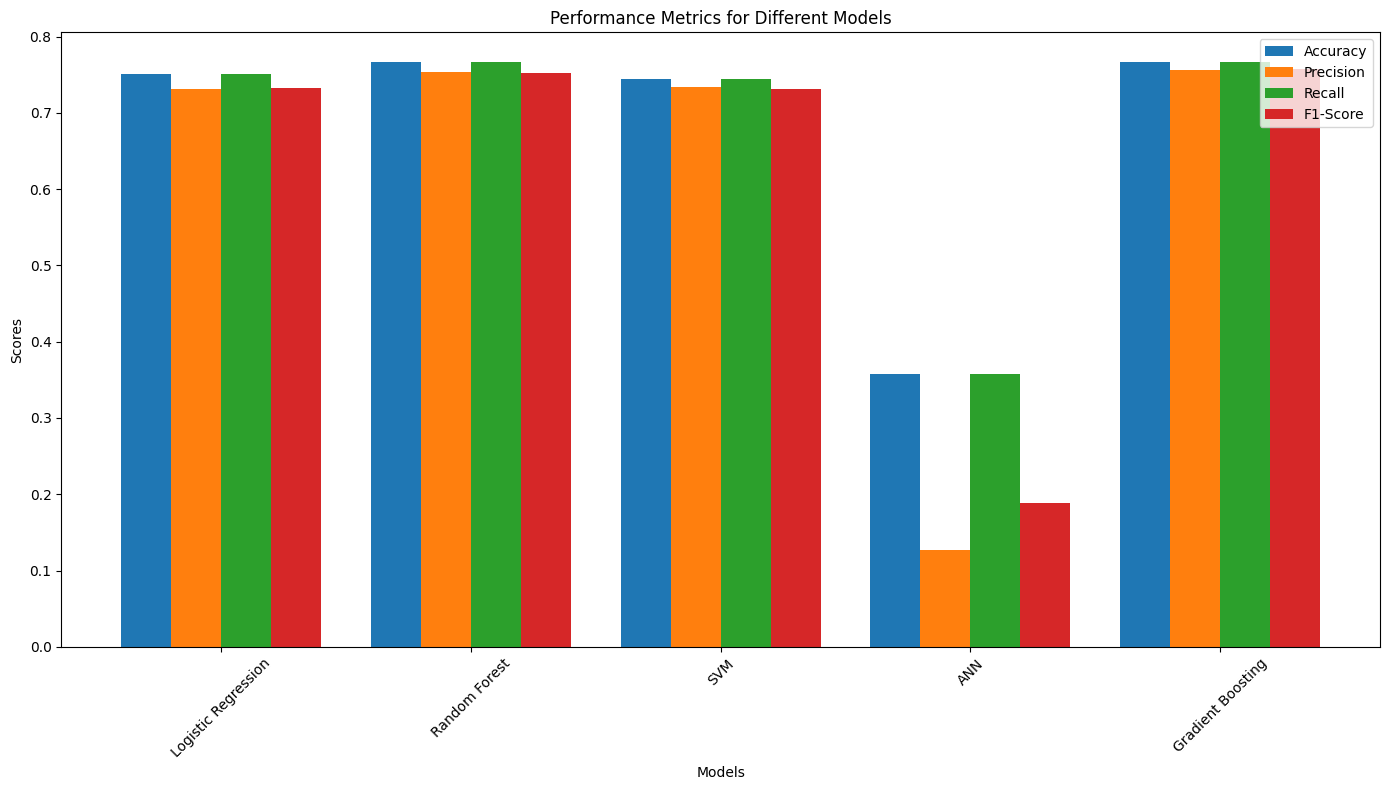

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier



# Load the data
# data = pd.read_csv('your_data.csv')

# Assuming the last column is the target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to convert multiclass confusion matrix to binary confusion matrix for a given class
def convert_to_binary_confusion_matrix(conf_matrix, class_index):
    TP = conf_matrix[class_index, class_index]
    FN = np.sum(conf_matrix[class_index, :]) - TP
    FP = np.sum(conf_matrix[:, class_index]) - TP
    TN = np.sum(conf_matrix) - (TP + FN + FP)

    return np.array([[TN, FP],
                     [FN, TP]])

# Function to evaluate and return metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Initialize lists to store metrics
models = ['Logistic Regression', 'Random Forest', 'SVM', 'ANN', 'Gradient Boosting']
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Logistic Regression with Grid Search
print("Logistic Regression")
lr_param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_param_grid, cv=5, verbose=1)
lr_grid.fit(X_train, y_train)
print(f"Best Parameters: {lr_grid.best_params_}")
accuracy, precision, recall, f1 = evaluate_model(lr_grid, X_test, y_test)
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1)

# Random Forest with Grid Search
print("Random Forest")
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, verbose=1)
rf_grid.fit(X_train, y_train)
print(f"Best Parameters: {rf_grid.best_params_}")
accuracy, precision, recall, f1 = evaluate_model(rf_grid, X_test, y_test)
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1)

# Support Vector Machine with Grid Search
print("Support Vector Machine")
svm_param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=5, verbose=1)
svm_grid.fit(X_train, y_train)
print(f"Best Parameters: {svm_grid.best_params_}")
accuracy, precision, recall, f1 = evaluate_model(svm_grid, X_test, y_test)
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1)

# Artificial Neural Network
def build_ann(optimizer='adam'):
    model = Sequential()
    model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=8, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))  # Use sigmoid for binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

print("Artificial Neural Network")
ann_model = KerasClassifier(model=build_ann, verbose=0)
ann_param_grid = {'batch_size': [10, 20], 'epochs': [50, 100], 'optimizer': ['adam', 'rmsprop']}
ann_grid = GridSearchCV(estimator=ann_model, param_grid=ann_param_grid, cv=5, verbose=1)
ann_grid.fit(X_train, y_train)
print(f"Best Parameters: {ann_grid.best_params_}")
y_pred_ann = (ann_grid.predict(X_test) > 0.5).astype(int)
accuracy, precision, recall, f1 = evaluate_model(ann_grid, X_test, y_test)
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1)

# Gradient Boosting with Grid Search
print("Gradient Boosting")
gb_param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_param_grid, cv=5, verbose=1)
gb_grid.fit(X_train, y_train)
print(f"Best Parameters: {gb_grid.best_params_}")
accuracy, precision, recall, f1 = evaluate_model(gb_grid, X_test, y_test)
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1)

# Plot the metrics
bar_width = 0.2
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(index - bar_width*1.5, accuracies, bar_width, label='Accuracy')
bar2 = ax.bar(index - bar_width*0.5, precisions, bar_width, label='Precision')
bar3 = ax.bar(index + bar_width*0.5, recalls, bar_width, label='Recall')
bar4 = ax.bar(index + bar_width*1.5, f1_scores, bar_width, label='F1-Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Models')
ax.set_xticks(index)
ax.set_xticklabels(models, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
pip uninstall tensorflow keras -y


Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: keras 3.4.1
Uninstalling keras-3.4.1:
  Successfully uninstalled keras-3.4.1


In [ ]:
pip install tensorflow


In [ ]:
pip install --upgrade scikit-learn


In [ ]:
pip install keras


In [ ]:
pip install scikeras


In [ ]:
pip install --upgrade tensorflow


In [ ]:
pip install tensorflow


Logistic Regression
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Random Forest
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': 30, 'n_estimators': 300}
Support Vector Machine
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Artificial Neural Network
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

Best Parameters: {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


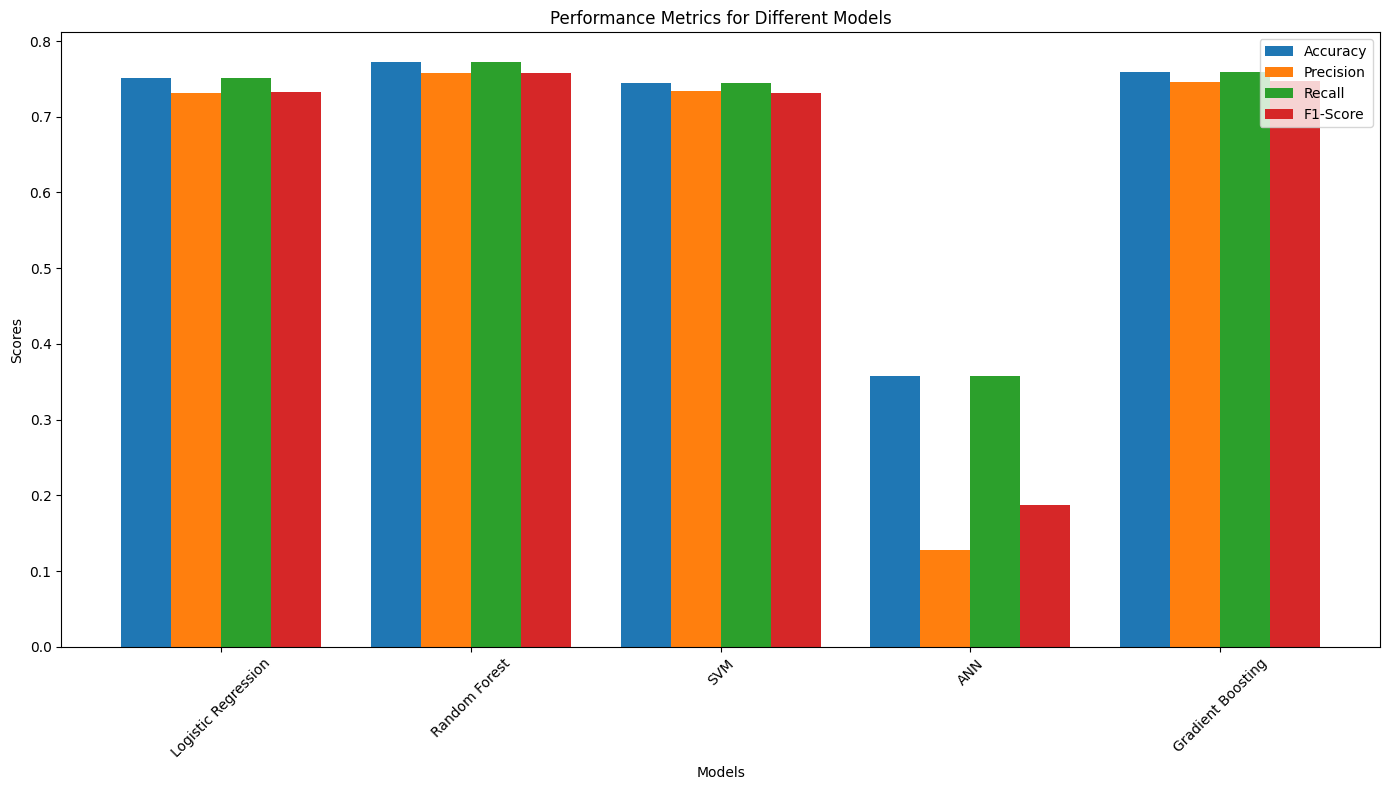

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier  # Updated import
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Load the data
# data = pd.read_csv('your_data.csv')

# Assuming the last column is the target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to evaluate and return metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Initialize lists to store metrics
models = ['Logistic Regression', 'Random Forest', 'SVM', 'ANN', 'Gradient Boosting']
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Logistic Regression with Grid Search
print("Logistic Regression")
lr_param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_param_grid, cv=5, verbose=1)
lr_grid.fit(X_train, y_train)
print(f"Best Parameters: {lr_grid.best_params_}")
accuracy, precision, recall, f1 = evaluate_model(lr_grid, X_test, y_test)
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1)

# Random Forest with Grid Search
print("Random Forest")
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, verbose=1)
rf_grid.fit(X_train, y_train)
print(f"Best Parameters: {rf_grid.best_params_}")
accuracy, precision, recall, f1 = evaluate_model(rf_grid, X_test, y_test)
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1)

# Support Vector Machine with Grid Search
print("Support Vector Machine")
svm_param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=5, verbose=1)
svm_grid.fit(X_train, y_train)
print(f"Best Parameters: {svm_grid.best_params_}")
accuracy, precision, recall, f1 = evaluate_model(svm_grid, X_test, y_test)
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1)

# Artificial Neural Network
def build_ann(optimizer='adam'):
    model = Sequential()
    model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=8, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))  # Use sigmoid for binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

print("Artificial Neural Network")
ann_model = KerasClassifier(build_fn=build_ann, verbose=0)
ann_param_grid = {'batch_size': [10, 20], 'epochs': [50, 100], 'optimizer': ['adam', 'rmsprop']}
ann_grid = GridSearchCV(estimator=ann_model, param_grid=ann_param_grid, cv=5, verbose=1)
ann_grid.fit(X_train, y_train)
print(f"Best Parameters: {ann_grid.best_params_}")
y_pred_ann = (ann_grid.predict(X_test) > 0.5).astype(int)
accuracy, precision, recall, f1 = evaluate_model(ann_grid, X_test, y_test)
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1)

# Gradient Boosting with Grid Search
print("Gradient Boosting")
gb_param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_param_grid, cv=5, verbose=1)
gb_grid.fit(X_train, y_train)
print(f"Best Parameters: {gb_grid.best_params_}")
accuracy, precision, recall, f1 = evaluate_model(gb_grid, X_test, y_test)
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1)

# Plot the metrics
bar_width = 0.2
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(index - bar_width*1.5, accuracies, bar_width, label='Accuracy')
bar2 = ax.bar(index - bar_width*0.5, precisions, bar_width, label='Precision')
bar3 = ax.bar(index + bar_width*0.5, recalls, bar_width, label='Recall')
bar4 = ax.bar(index + bar_width*1.5, f1_scores, bar_width, label='F1-Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Models')
ax.set_xticks(index)
ax.set_xticklabels(models, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()
